In [1]:
from pandas_datareader import data as pdr
import datetime as dt
import pandas as pd
import yfinance as yf 
import numpy as np
import pylab
import seaborn as sns
import scipy.stats as stats
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots 

pyo.init_notebook_mode(connected = True)
pd.options.plotting.backend = 'plotly'

In [2]:
yf.pdr_override()

In [3]:
end = dt.datetime.now()
start = dt.datetime(2020,1,1)

df =  pdr.get_data_yahoo('AGL.JO', start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head()

Open     High      Low    Close     Adj Close   Volume
Date                                                                 
2020-01-02  40100.0  40849.0  40099.0  40618.0  35746.992188   801776
2020-01-03  40600.0  40741.0  40265.0  40559.0  35695.066406  1089711
2020-01-06  40474.0  40654.0  39818.0  40181.0  35362.394531   616068
2020-01-07  40226.0  40249.0  39638.0  40064.0  35259.425781   922299
2020-01-08  40149.0  40120.0  39456.0  40120.0  35308.714844  1448406

In [5]:
simple_returns = df.Close.pct_change().dropna()
simple_returns

Date
2020-01-03   -0.001453
2020-01-06   -0.009320
2020-01-07   -0.002912
2020-01-08    0.001398
2020-01-09   -0.008649
                ...   
2023-10-17   -0.013950
2023-10-18   -0.024706
2023-10-19   -0.015733
2023-10-20   -0.043088
2023-10-23   -0.021642
Name: Close, Length: 953, dtype: float64

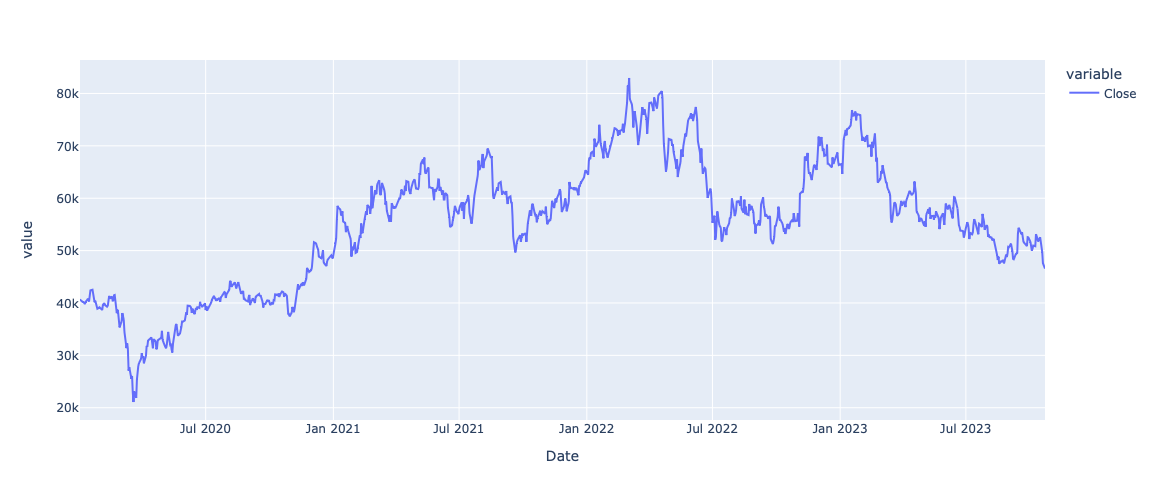

In [6]:
df.Close.plot().update_layout(autosize = False, width = 800, height = 500)

In [7]:
print( 'First', df.Close[0], 'Last', df.Close[-1])

First 40618.0 Last 46562.0


In [8]:
df.Close[0] * (1+simple_returns.mean()) **len(simple_returns)

65894.51923449748

Can't use mean as it is not useful statistic for this

In [9]:
df.Close[0] * np.prod( [(1 + Rt) for Rt in simple_returns] )

46561.999999999956

In [10]:
log_returns = np.log(df.Close/df.Close.shift(1)).dropna()
log_returns

Date
2020-01-03   -0.001454
2020-01-06   -0.009363
2020-01-07   -0.002916
2020-01-08    0.001397
2020-01-09   -0.008687
                ...   
2023-10-17   -0.014049
2023-10-18   -0.025016
2023-10-19   -0.015858
2023-10-20   -0.044044
2023-10-23   -0.021880
Name: Close, Length: 953, dtype: float64

In [11]:
log_returns.mean()

0.00014330896087740927

In [12]:
df.Close[0] * np.exp(log_returns.mean() * len(log_returns)) #allows you to use mean to more accurately calculate returns. unlike simple return

46561.99999999999

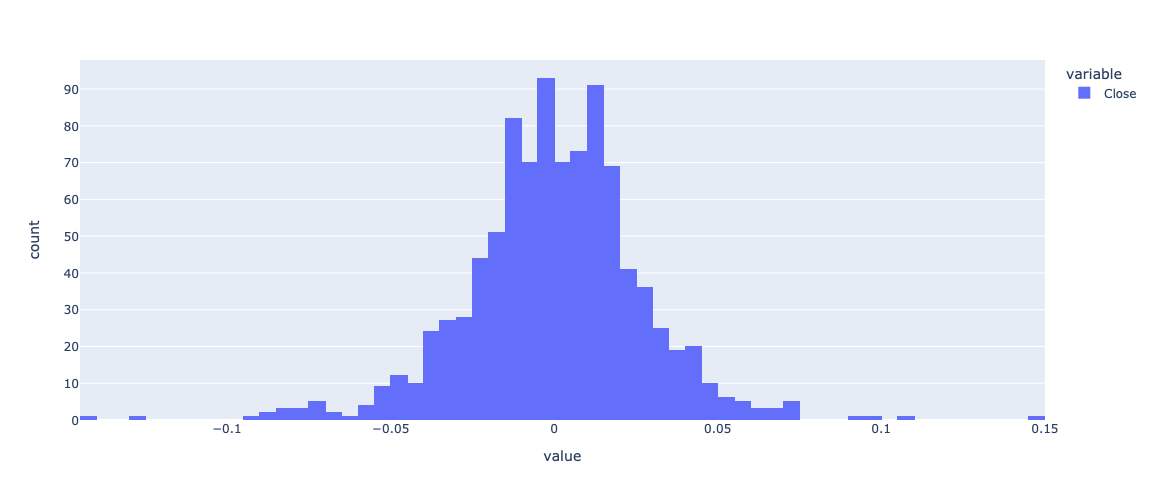

In [13]:
log_returns.plot(kind = 'hist').update_layout(autosize = False, width = 800, height = 500)

In [14]:
log_returns_sorted = log_returns.tolist()
log_returns_sorted.sort()
worst = log_returns_sorted[0]
best = log_returns_sorted[-1]

In [15]:
std_worst = (worst - log_returns.mean())/log_returns.std()
std_best = (best - log_returns.mean())/log_returns.std()

In [16]:
print( 'Std dev. worst %.2f best %.2f' %(std_worst, std_best))
print( 'Prob worst. worst %.15f best %.15f' %(stats.norm(0,1).pdf(std_worst), stats.norm(0,1).pdf(std_worst)))

Std dev. worst -5.25 best 5.53
Prob worst. worst 0.000000410560322 best 0.000000410560322


finacial data is not normally distribued 

Q-Q Plot


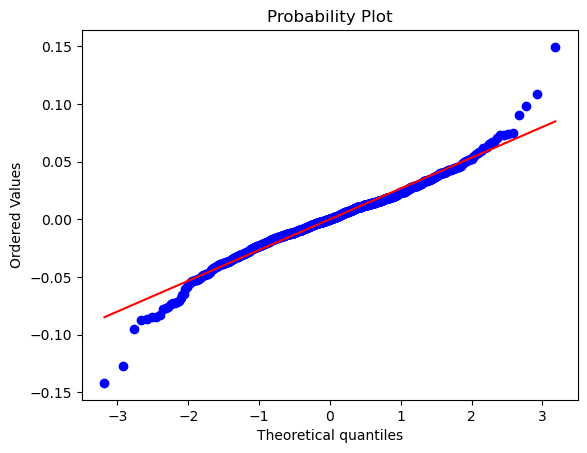

In [17]:
stats.probplot(log_returns, dist= 'norm', plot = pylab)
print('Q-Q Plot')

Probabilty of tailed events occuring are extremely low but it does occur in financial data

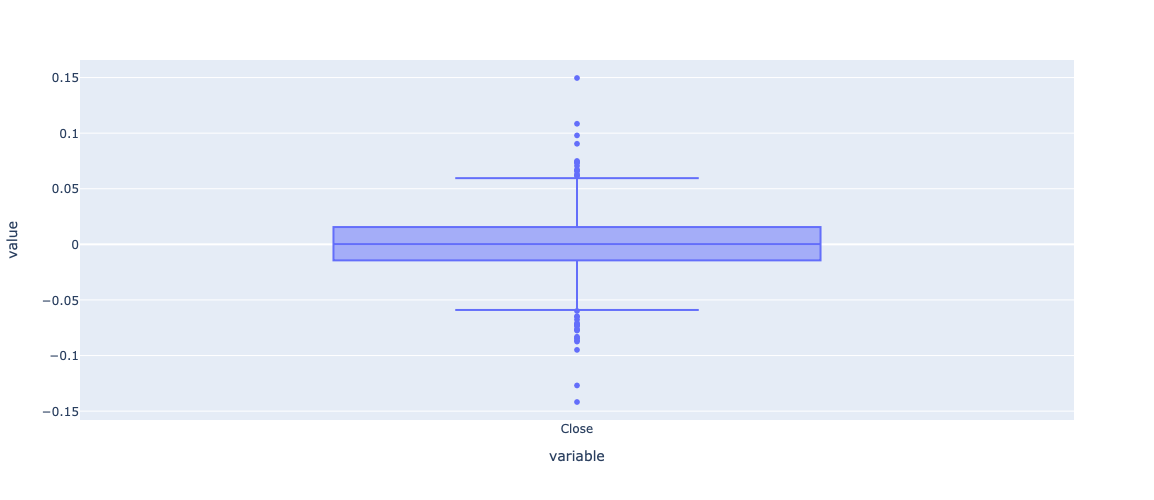

In [18]:
log_returns.plot(kind = 'box').update_layout(autosize = False, width = 800, height = 500)

In [19]:
ks_stat, p_value = stats.kstest(log_returns, 'norm')
print(ks_stat, p_value)
if p_value > 0.05:
    print('Probably Guassian')
else:
    print('Probably not Guassian')

0.4659138953506504 4.569056203625594e-190
Probably not Guassian


Histotical volatility and risk measures

In [20]:
end = dt.datetime.now()
start = dt.datetime(2018,1,1)
df2 =  pdr.get_data_yahoo(['FSR.JO', 'SBK.JO','NED.JO','ABG.JO', '^J580.JO'], start, end)
Close = df2.Close
Close.head()

[*********************100%%**********************]  5 of 5 completed


ABG.JO  FSR.JO   NED.JO   SBK.JO      ^J580.JO
Date                                                       
2018-01-02  17736.0  6628.0  26112.0  19428.0  47050.671875
2018-01-03  16962.0  6330.0  25200.0  18507.0  46057.691406
2018-01-04  16960.0  6316.0  25232.0  18759.0  45871.398438
2018-01-05  17000.0  6371.0  25830.0  18780.0  46072.621094
2018-01-08  17096.0  6314.0  25550.0  18974.0  46151.281250

In [25]:
log_returns2 = np.log(df2.Close/df2.Close.shift(1)).dropna()
log_returns2

ABG.JO    FSR.JO    NED.JO    SBK.JO  ^J580.JO
Date                                                        
2018-01-03 -0.044621 -0.046003 -0.035551 -0.048566 -0.021330
2018-01-04 -0.000118 -0.002214  0.001269  0.013525 -0.004053
2018-01-05  0.002356  0.008670  0.023424  0.001119  0.004377
2018-01-08  0.005631 -0.008987 -0.010899  0.010277  0.001706
2018-01-09  0.030190  0.003952  0.018420  0.012257  0.000410
...              ...       ...       ...       ...       ...
2023-10-17  0.001372  0.014943  0.003827  0.023023  0.004565
2023-10-18 -0.013050 -0.025305 -0.018840 -0.005693 -0.013996
2023-10-19  0.001850  0.000331 -0.005435 -0.001678 -0.002639
2023-10-20 -0.024736 -0.009132 -0.013265 -0.029444 -0.018235
2023-10-23  0.013000  0.016215  0.011232  0.006356  0.005376

[1431 rows x 5 columns]

In [29]:
daily_std = log_returns2.std()
daily_std

ABG.JO      0.023574
FSR.JO      0.021678
NED.JO      0.024407
SBK.JO      0.021546
^J580.JO    0.015571
dtype: float64

In [31]:
annualised_vol = daily_std * np.sqrt(252)
annualised_vol*100

ABG.JO      37.422900
FSR.JO      34.413095
NED.JO      38.745106
SBK.JO      34.203869
^J580.JO    24.718963
dtype: float64

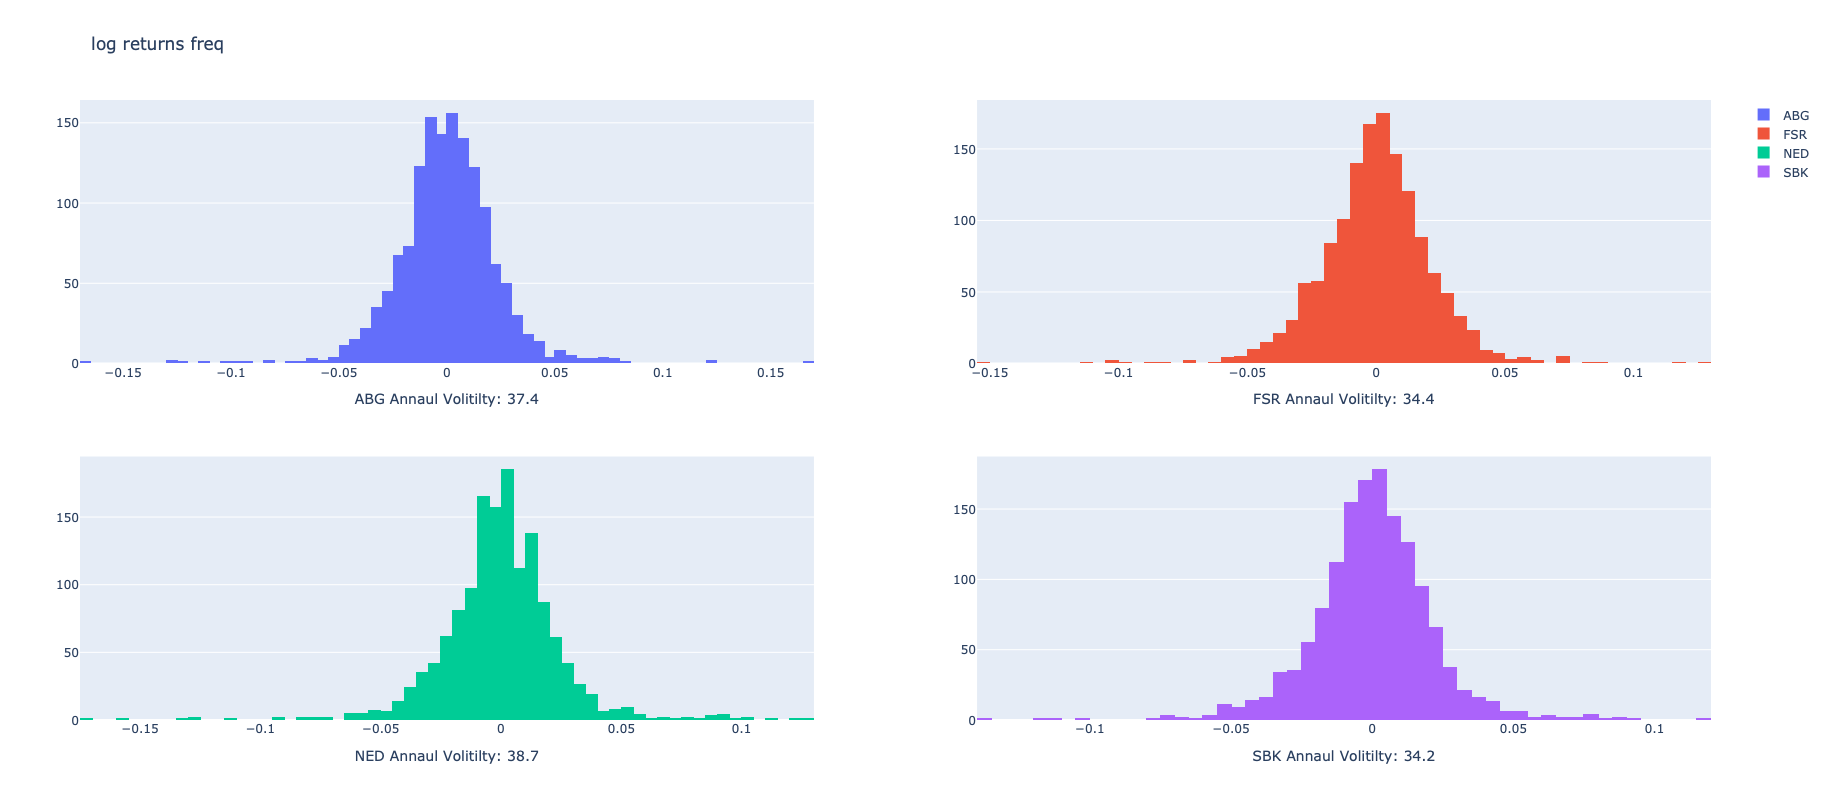

In [44]:
fig = make_subplots( rows = 2, cols = 2)
trace0 = go.Histogram(x = log_returns2['ABG.JO'], name = 'ABG')
trace1 = go.Histogram(x = log_returns2['FSR.JO'], name = 'FSR')
trace2 = go.Histogram(x = log_returns2['NED.JO'], name = 'NED')
trace3 = go.Histogram(x = log_returns2['SBK.JO'], name = 'SBK')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)

fig.update_layout(autosize = False, width = 1000, height = 800, title = 'log returns freq',
                 xaxis = dict(title ='ABG Annaul Volitilty: ' + str(np.round(annualised_vol['ABG.JO']*100,1))),
                 xaxis2 = dict(title='FSR Annaul Volitilty: ' + str(np.round(annualised_vol['FSR.JO']*100,1))),
                 xaxis3 = dict(title='NED Annaul Volitilty: ' + str(np.round(annualised_vol['NED.JO']*100,1))),
                 xaxis4 = dict(title='SBK Annaul Volitilty: ' + str(np.round(annualised_vol['SBK.JO']*100,1))),)

fig.show()

In [48]:
trading_days = 60
vol = log_returns2.rolling(window= trading_days).std()*np.sqrt(trading_days)

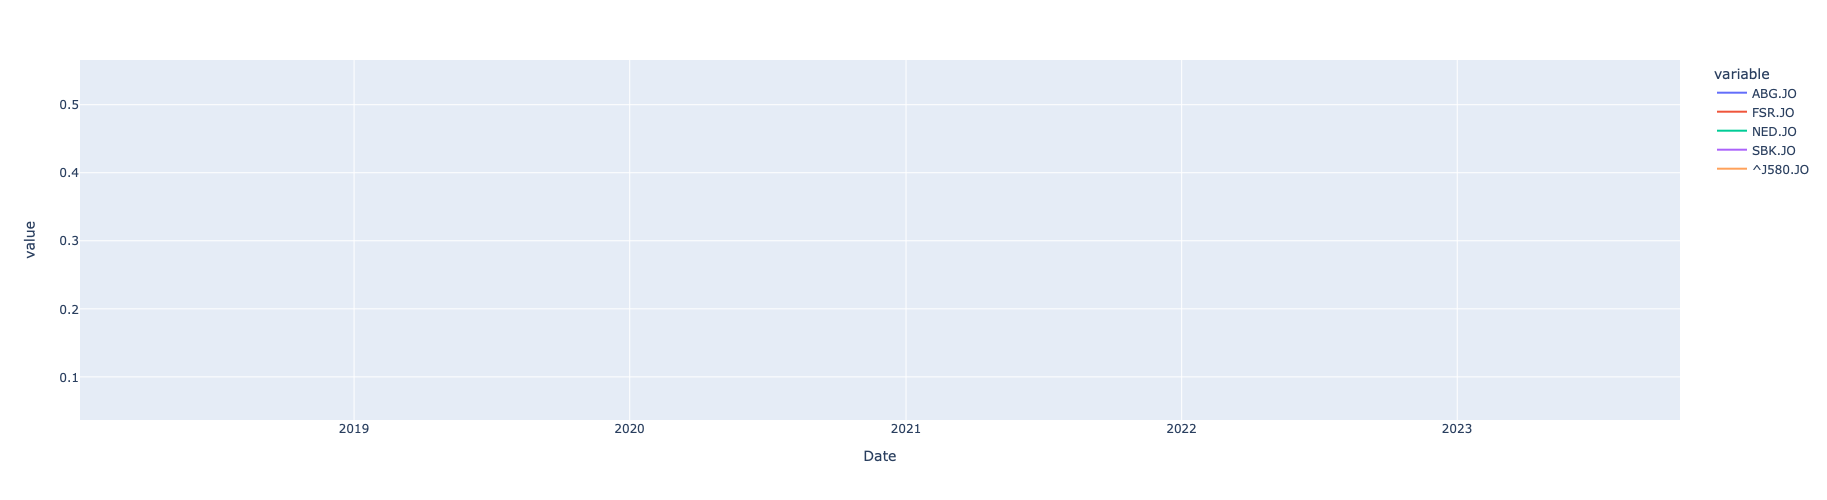

In [ ]:
vol.plot().update_layout(autosize = False, width = 800, height = 500)

Risk Return Ratios 

In [51]:
Rf = 0.04/252
sharpe_ratio = (log_returns2.rolling(window = trading_days).mean() - Rf)*trading_days/vol

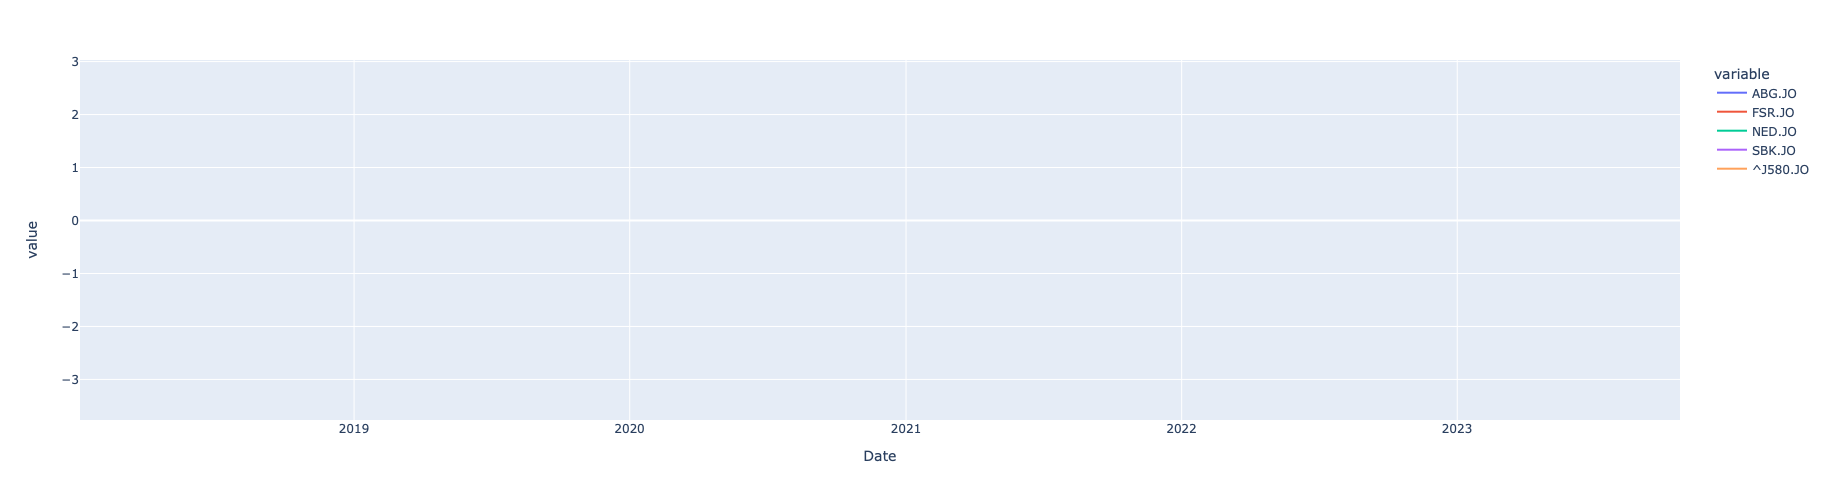

In [53]:
sharpe_ratio.plot().update_layout(autosize = False, width = 800, height = 500) #help understand how volatility changes overtime using one graph

In [58]:
 sortino_vol = log_returns2[log_returns2<0].rolling(window= trading_days, center = True, min_periods =10).std()*np.sqrt(trading_days)
sortino_ratio = (log_returns2.rolling(window = trading_days).mean() - Rf)*trading_days/sortino_vol

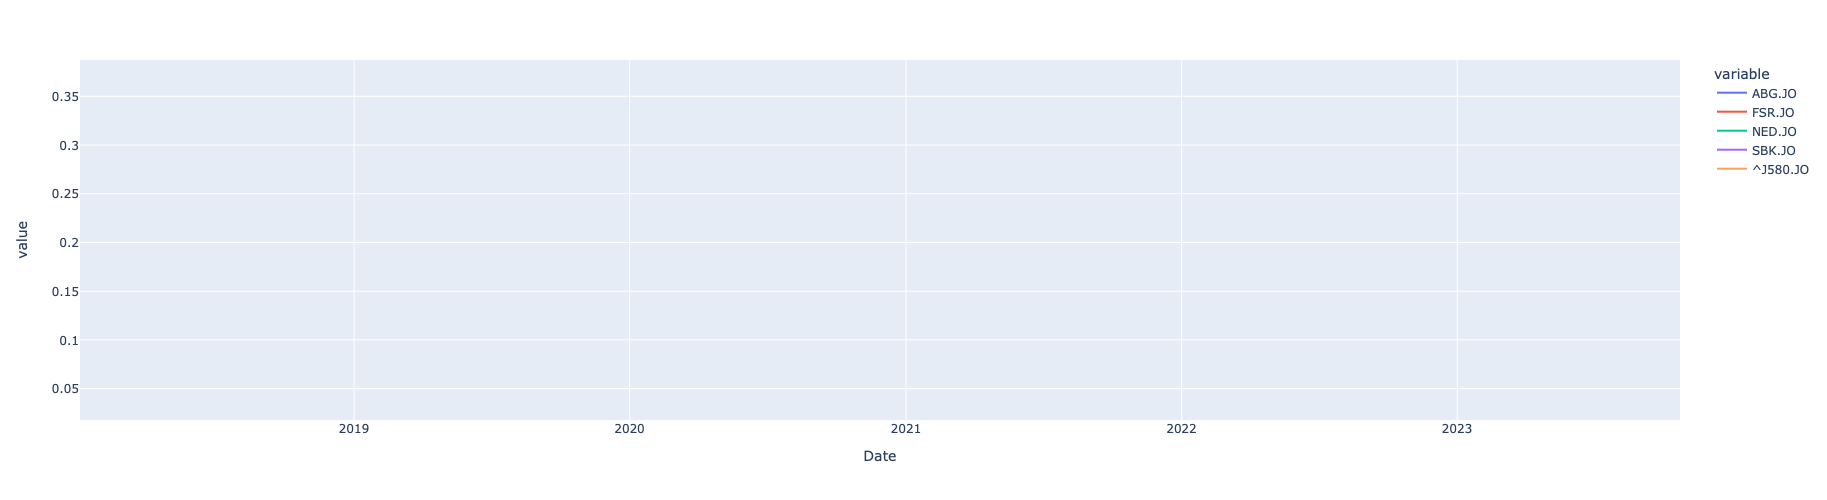

In [61]:
 sortino_vol.plot().update_layout(autosize = False, width = 800, height = 500) #different shape to vol graph as it only takes into account downside volatilty 

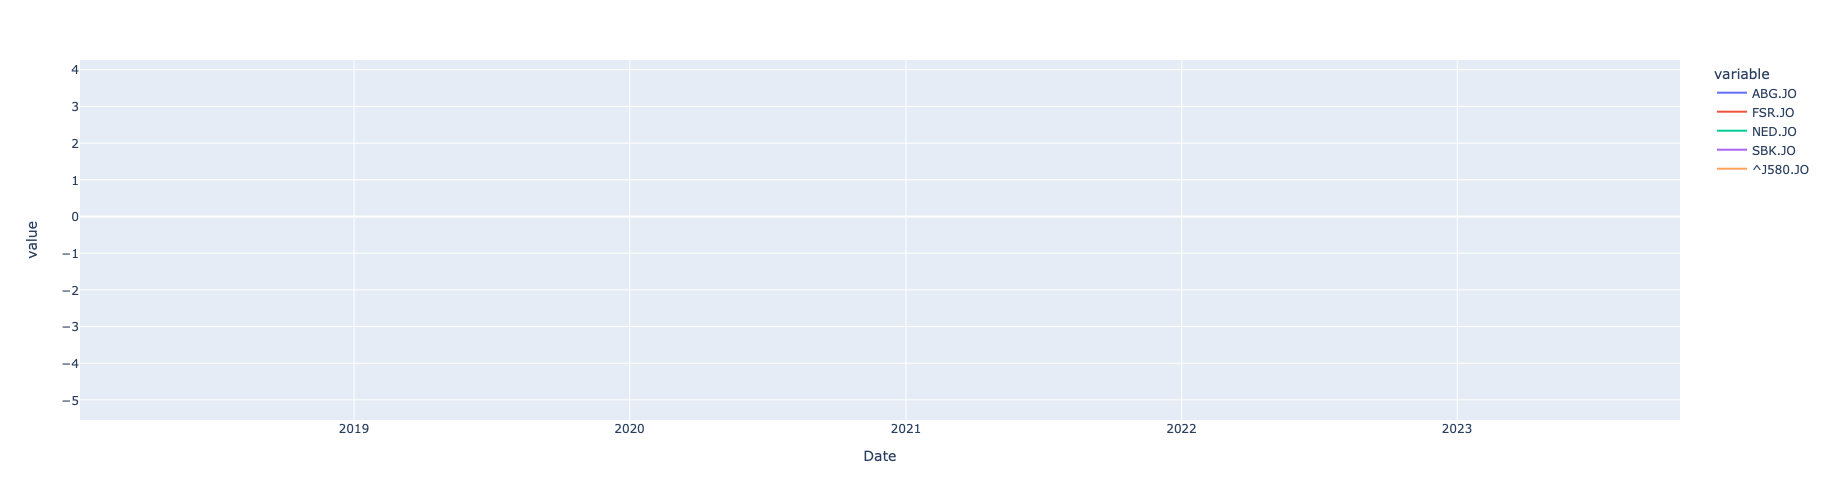

In [60]:
sortino_ratio.plot().update_layout(autosize = False, width = 800, height = 500)

In [64]:
m2_ratio = pd.DataFrame()

benchmark_vol = vol['^J580.JO']
for c in log_returns2.columns:
    if c != '^J580.JO':
        m2_ratio[c] = (sharpe_ratio[c]*benchmark_vol/trading_days + Rf)*trading_days

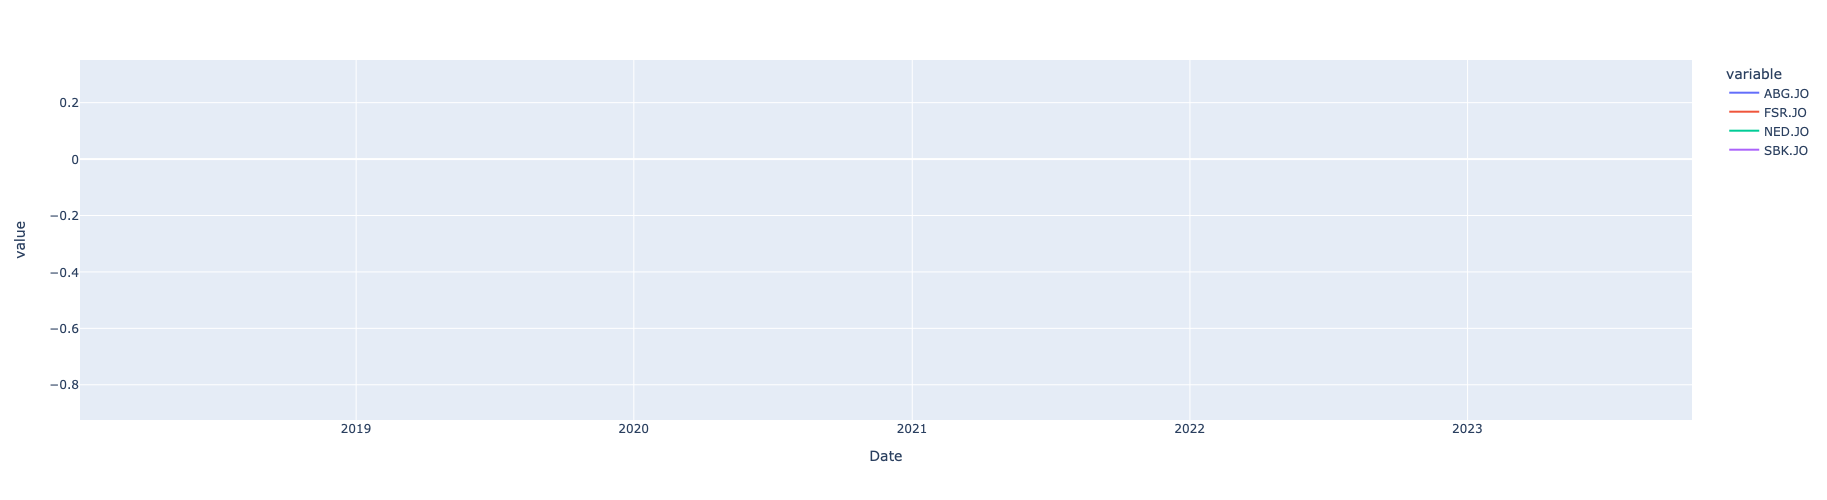

In [66]:
m2_ratio.plot().update_layout(autosize = False, width = 800, height = 500) #pct change over time of stocks with respects to market index (benchmark)#